# Data import and Exploratory Data Analysis (EDA)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from scipy.stats import boxcox
from datetime import date
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999

# 1.- Data import and preparation

### For the cleaning function we will:
- Drop the rows which have 8 or more bedrooms: there are only 24 out of 21600 houses (1,1% of the dataset), so they are clearly outliers. Our model will not be able to predict the prices of houses with more than 7 bedrooms.
- Likewise, there are 58 houses with less than 1 bathroom, and 15 houses with 6 or more bathrooms (maximum of 8). We eliminate those rows.
- In the columns sqft_living and sqft_lots there are clear outliers, judging from the standar deviation. Only 55 houses have more than 6,000 square feet of living spaces, so we eliminate them. For the sqft_lots it's even more skewed. Eliminating the 1678 houses with more thant 30000 square feet of the lot, we will improve the accuracy of the model considerably.
- We also eliminate the clear outliers in "sqft_lot15". 
- As for the view column, the vast majority have 0 (more than 17500). Then 315 have 1, 853 have 2, 437 have 3, and 265 have 4. We will convert it to a binary variable, 0 if it is 0, 1 otherwise.
- Condition: only 168 houses have a condition of 1 or 2, so we will eliminate them as outliers.
- sqft_basement: we convert this in a binary variable: 0 if no basement (around 12000) and 1 if basement (around 8000).
- Renovated: there are around 400 houses that have been renovated in 2000 and after, we will give them a 2. For the 380 houses that were renovated in 1999 or before, we will give a 1. For the rest that haven't been renovated, we will keep the 0 (vast majority).


In [36]:
def clean_data(df):
    df=df.drop(columns=['id', 'date'])
    df = df[df["bedrooms"] <= 8]
    df = df[(df["bathrooms"] < 6) & (df["bathrooms"] >= 1)]
    df = df[df["sqft_living"] <= 6000]
    df = df[df["sqft_lot"] <= 30000]
    df = df[df["sqft_lot15"] <= 30000]
    df.loc[df["view"] != 0, "view"] = 1
    df = df[df["condition"] > 2]
    df.loc[df["sqft_basement"] != 0, "sqft_basement"] = 1
    df.loc[(df["yr_renovated"]!=0)&(df["yr_renovated"]<2000), "yr_renovated"] = 1
    df.loc[df["yr_renovated"]>=2000, "yr_renovated"] = 2
    
  
    return df

In [37]:
path = r"..\Data_Midterm.xls"
rs = pd.read_excel(path, engine="xlrd")
rs = clean_data(rs)

In [38]:
rs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19521 entries, 0 to 21595
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       19521 non-null  int64  
 1   bathrooms      19521 non-null  float64
 2   sqft_living    19521 non-null  int64  
 3   sqft_lot       19521 non-null  int64  
 4   floors         19521 non-null  float64
 5   waterfront     19521 non-null  int64  
 6   view           19521 non-null  int64  
 7   condition      19521 non-null  int64  
 8   grade          19521 non-null  int64  
 9   sqft_above     19521 non-null  int64  
 10  sqft_basement  19521 non-null  int64  
 11  yr_built       19521 non-null  int64  
 12  yr_renovated   19521 non-null  int64  
 13  zipcode        19521 non-null  int64  
 14  lat            19521 non-null  float64
 15  long           19521 non-null  float64
 16  sqft_living15  19521 non-null  int64  
 17  sqft_lot15     19521 non-null  int64  
 18  price 

## 2. Exploratory Data Analysis

We begin by casting several types into floats, in order to visualise properly. 


In [39]:
rs_viz = rs.astype({"price": np.float64, "sqft_living": np.float64, "sqft_living15": np.float64,
                    "sqft_lot": np.float64, "sqft_above": np.float64,"sqft_lot15": np.float64})

Now we visualise the frecuency of the data, applying binning in the appropriate columns. for this we use the value counts for each column.

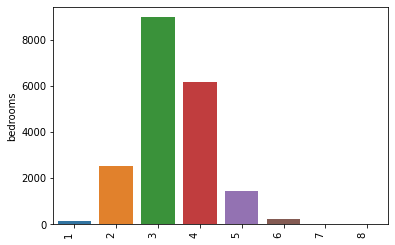

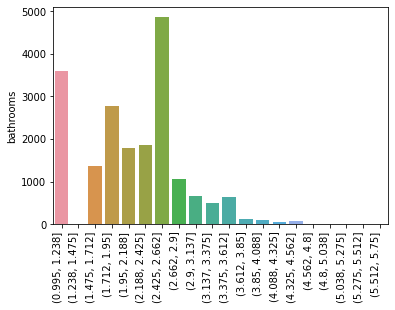

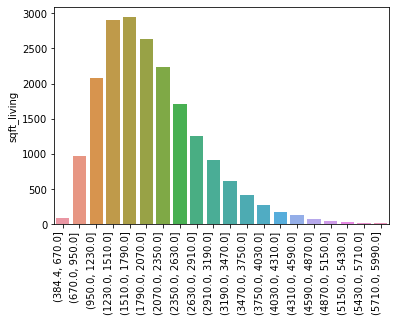

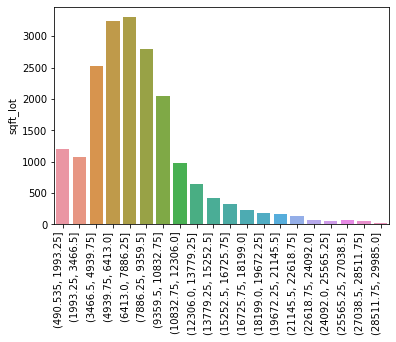

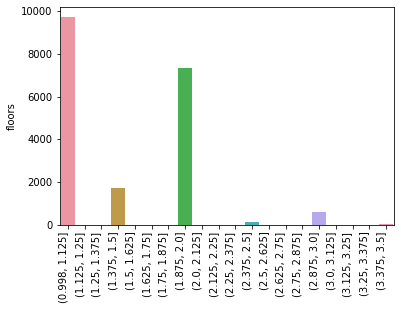

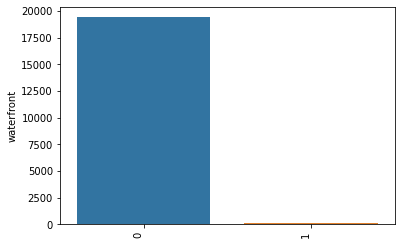

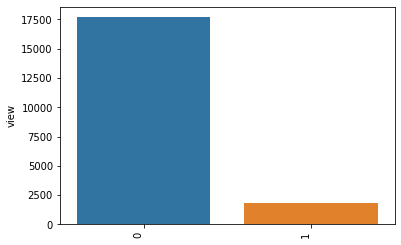

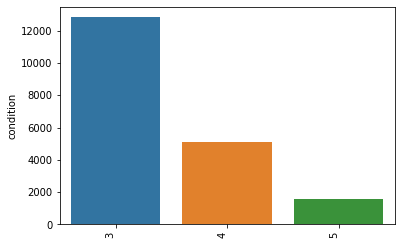

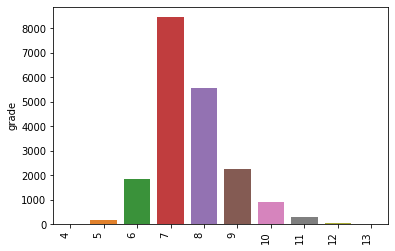

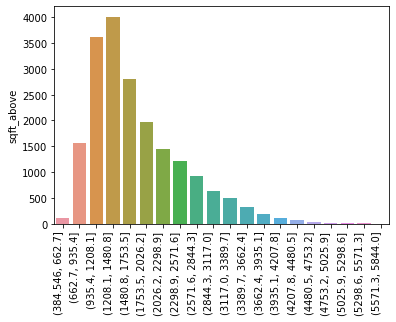

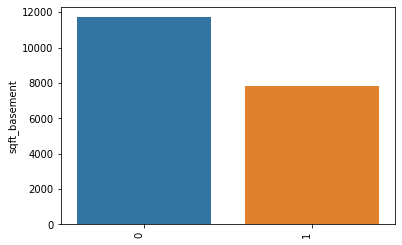

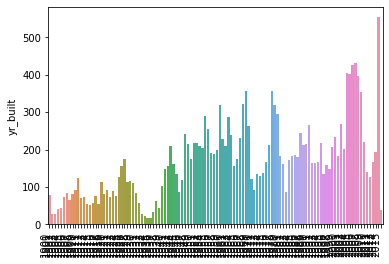

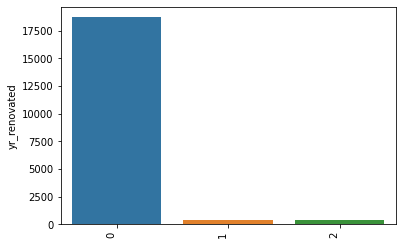

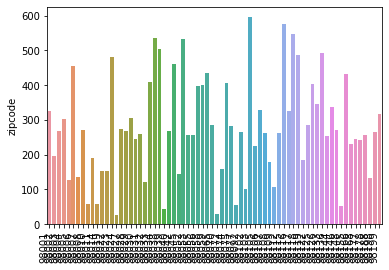

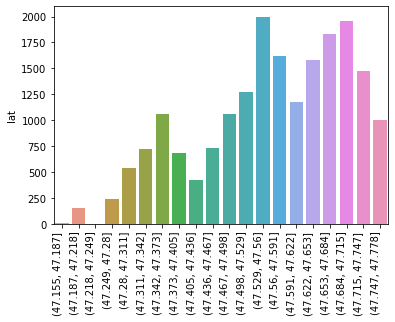

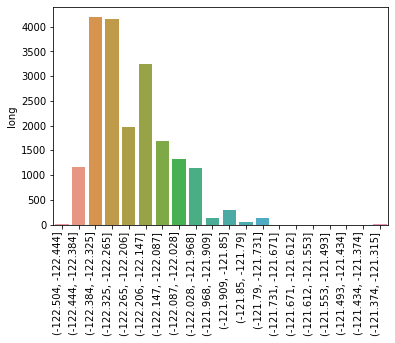

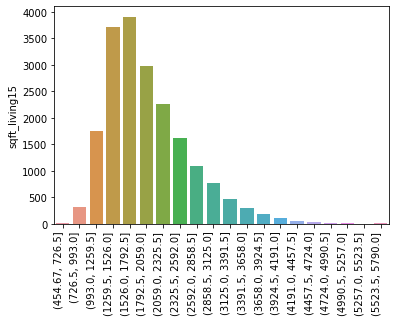

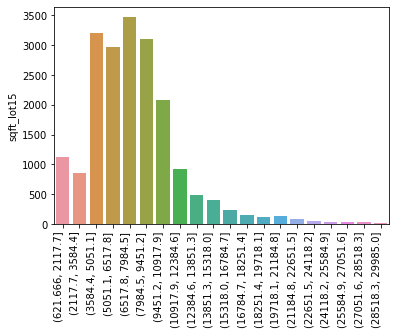

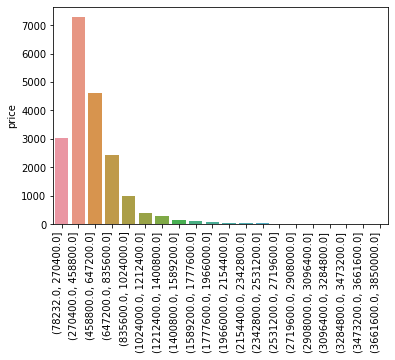

In [35]:
for col in rs_viz.columns:

    if rs_viz[col].dtype == np.float64:
        binned = pd.cut(rs_viz[col],bins=20)
    else:
        binned =rs_viz[col]
    
    counts = binned.value_counts()
    
    # Sorting indices so it's easier to read, important for the binned values
    counts.sort_index(inplace=True)
    
    plot = sns.barplot(x = counts.index, y = counts)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.ylabel(col)
    plt.show()


In [9]:
rs["sqft_lot15"].describe()

count    19521.000000
mean      7613.022540
std       3990.658037
min        651.000000
25%       5000.000000
50%       7350.000000
75%       9375.000000
max      29985.000000
Name: sqft_lot15, dtype: float64

In [10]:
mask = rs["sqft_lot15"] < 30000
rs[mask]["sqft_lot15"].describe()

count    19521.000000
mean      7613.022540
std       3990.658037
min        651.000000
25%       5000.000000
50%       7350.000000
75%       9375.000000
max      29985.000000
Name: sqft_lot15, dtype: float64

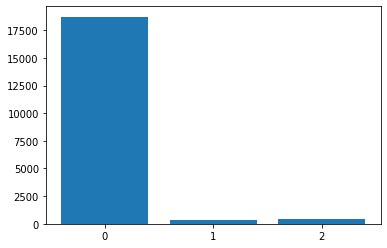

In [11]:
#height = rs.loc[rs["bathrooms"] > 5.5, "bathrooms"].value_counts()
#bars = rs.loc[rs["bathrooms"] > 5.5, "bathrooms"].value_counts().index

height = rs["yr_renovated"].value_counts()
bars = rs["yr_renovated"].value_counts().index
# Create bars
plt.bar(bars, height)

# Create names on the x-axis
plt.xticks(bars)

# Show graphic
plt.show()